# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np
n_train = y_train.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(np.concatenate((y_train, y_test))))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

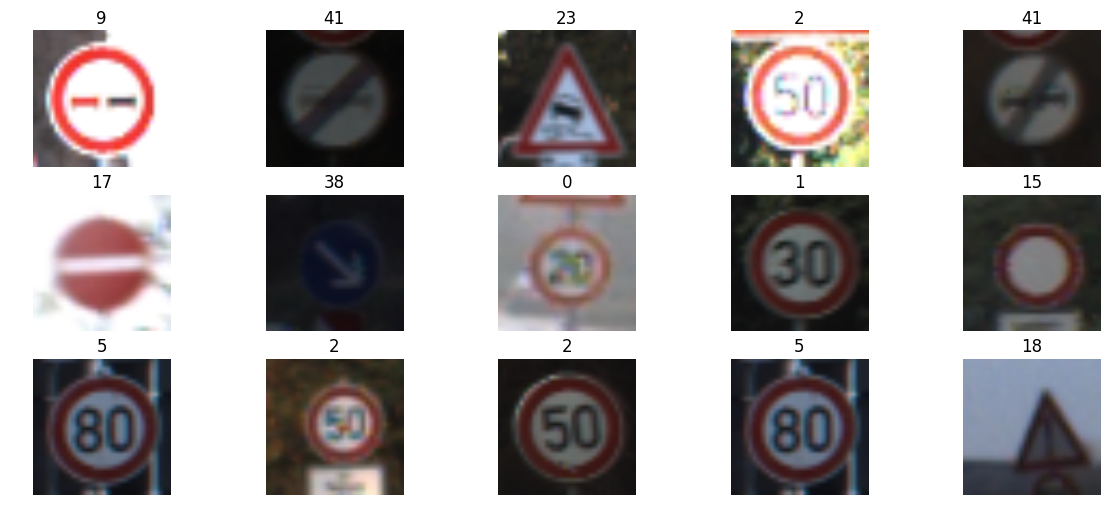

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# show 15 random images
fig, axs = plt.subplots(3,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(15):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

In [4]:
plt.imsave("sign.png", image, format="png")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

gray_scale done
stretch done


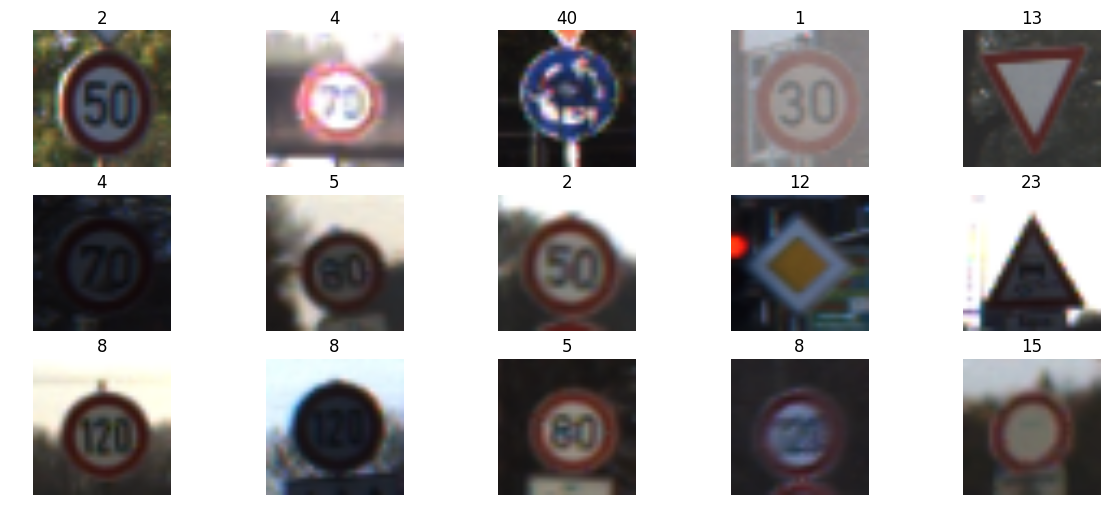

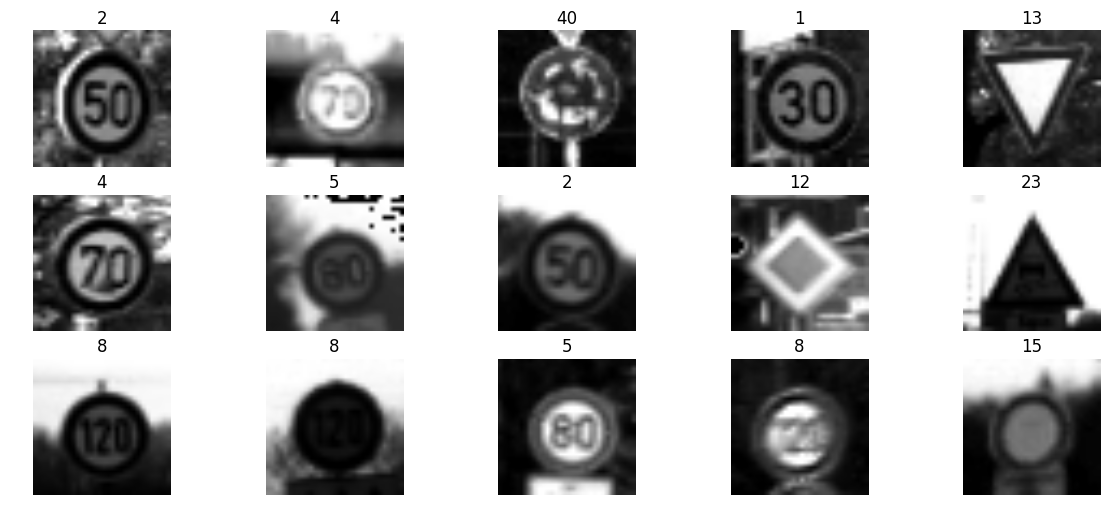

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from skimage import exposure
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from skimage import exposure
import random
import cv2

"""
I'm including the code for all data manipulations that I tried.
Only the uncommented functions at the bottom were selected as improving the model accurary (stretching the pixels uniformely and grayscaling)
"""

  
def stretch_pixels():
    """Stretch pixel values
    """
    for i in range(len(X_train)):
        img = X_train[i]
        p2 = np.percentile(img, 2)
        p98 = np.percentile(img, 98)
        img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
        X_train[i] = img_rescale
    for i in range(len(X_test)):
        img = X_test[i]
        p2 = np.percentile(img, 2)
        p98 = np.percentile(img, 98)
        img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
        X_test[i] = img_rescale
    print('stretch done')
    
def normalize_data(X_train, X_test):
    """Normalise input (images still in colour)
    """
    X_train = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
    X_test = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))
    print('normalize data done')

def augment_brightness_camera_images():
    for i in range(len(X_train)):
        image = X_train[i]
        image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
        random_bright = .25+np.random.uniform()
        #print(random_bright)
        image1[:,:,2] = image1[:,:,2]*random_bright
        image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
        X_train[i] = image1
    for i in range(len(X_test)):
        image = X_test[i]
        image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
        random_bright = .25+np.random.uniform()
        #print(random_bright)
        image1[:,:,2] = image1[:,:,2]*random_bright
        image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
        X_test[i] = image1

def normalize_pixels(X_train, X_test):
    X_train_normalized = (X_train - 128)/128 
    X_test_normalized = (X_test - 128)/128
    print('normalize pixels done')
    return X_train_normalized, X_test_normalized

def gray_scale(X_train, X_test):
    X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)
    X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)
    print('gray_scale done')
    return X_train_gry, X_test_gry


# show 10 random original images
index_ = []
fig, axs = plt.subplots(3,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(15):
    index = random.randint(0, len(X_train))
    index_.append(index)
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])
    #test_img_original = np.copy(X_train[index]) 
    
        
# process images
#augment_brightness_camera_images()
X_train, X_test =  gray_scale(X_train, X_test) 
stretch_pixels()
#normalize_data(X_train, X_test)
#X_train, X_test = normalize_pixels(X_train, X_test)


# show the same images after processing
fig, axs = plt.subplots(3,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(len(index_)):
    #index = random.randint(0, len(X_train))
    #index_.append(index)
    image = X_train[index_[i]]
    axs[i].axis('off')
    axs[i].imshow(image.squeeze(), cmap='gray')
    axs[i].set_title(y_train[index_[i]])
    #test_img_original = np.copy(X_train[index]) 

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I compared the model performance of several techniques. Below are the tecnhiques I tried, and the resulting model Accuracy. I decided to keep grayscaling in combination with stretching the pixel values uniformely across the range of 2-98 percentile. These gave better results than normalizing/standardizing the pixel distribution.


(Above, I included the code for all the different tecnhiques tried. The function call to those that did not improve performance is commented out.)

- Stretch pixel distribution (stretch_pixels_dist): Validation Accuracy = 0.956; Test Accuracy = 0.873
- standardize pixels (normalize_data): Validation Accuracy = 0.953; Test Accuracy = 0.873
- normalize_pixels (normalize_pixels): Validation Accuracy = 0.951, Test Accuracy = 0.881
- convert to grayscale (gray_scale): Validation Accuracy = 0.965; Test Accuracy = 0.874
- grayscale + normalize: Validation Accuracy = 0.959; Test Accuracy = 0.876
- grayscale + stretch: Validation Accuracy = 0.986; Test Accuracy = 0.923
- grayscale + stretch + normalize: Validation Accuracy = 0.982; Test Accuracy = 0.908

## Generate Additional data

In [7]:
import matplotlib as mpl
from skimage import data, segmentation, color
from skimage.future import graph
from skimage.transform import rotate
from matplotlib import pyplot as plt
from skimage.filters import gaussian
from skimage.transform import SimilarityTransform
from skimage.transform import warp


def additional_data(X_train, y_train):
    counts_number_of_images_per_label = {}
    for x in y_train:
        if x not in counts_number_of_images_per_label:
            counts_number_of_images_per_label[x]=1
        else:
            counts_number_of_images_per_label[x]+=1

    needed_to_equalize_to_max_count = {}

    max_count = max(counts_number_of_images_per_label.values())
    for i in counts_number_of_images_per_label:
        needed_to_equalize_to_max_count[i] = int(( max_count- 
                       counts_number_of_images_per_label[i])/counts_number_of_images_per_label[i])

    X_train_additional = []
    y_train_additional = []
    for i in range(len(X_train)):
        t = y_train[i]
        for x in range(needed_to_equalize_to_max_count[t]):
            img = rotate(X_train[i], random.choice([-15, 0, 15]))
            tform = SimilarityTransform(translation=(0, random.randint(-2,2)))
            img = warp(img, tform)
            img = gaussian(img, sigma=random.randint(0,8)/10)
            X_train_additional.append(img)
            y_train_additional.append(y_train[i])       
    X_train_ = np.concatenate((X_train, X_train_additional), axis=0)
    y_train_ = np.concatenate((y_train, y_train_additional), axis=0)      
    #print('additional data done')
    return X_train_, y_train_ 

Number of training examples in original set 39209


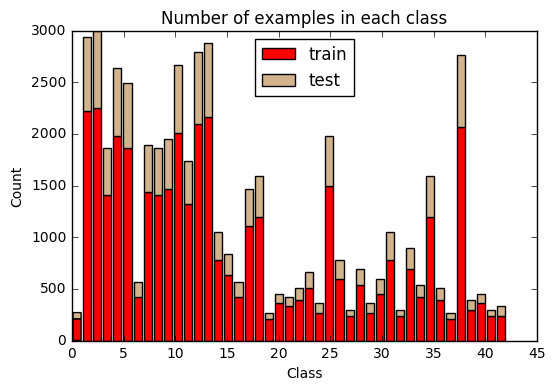

In [8]:
print("Number of training examples in original set", len(y_train))

# histogram number of cases per label of original data
colors = ['red', 'tan']
labels = ['train', 'test']
plt.hist((y_train,y_test), bins=n_classes, stacked='true', color=colors, label=labels, histtype='bar' )
plt.title('Number of examples in each class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(loc='best')
plt.show()


In [9]:
# Generate additional data
X_train , y_train = additional_data(X_train, y_train)
print("Number of training examples after adding additional data", len(y_train))


Number of training examples after adding additional data 83007


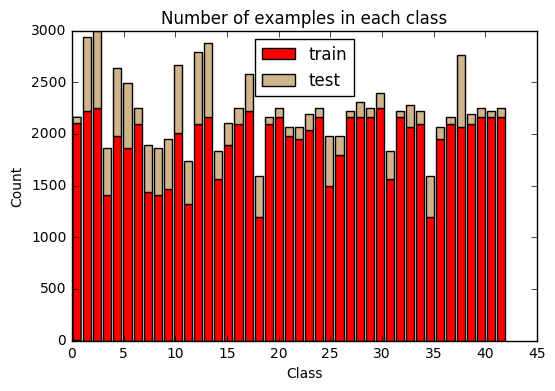

In [10]:
# histogram number of cases per label of original data
# histogram number of cases per label of original data
colors = ['red', 'tan']
labels = ['train', 'test']
plt.hist((y_train,y_test), bins=n_classes, stacked='true', color=colors, label=labels, histtype='bar' )
plt.title('Number of examples in each class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(loc='best')
plt.show()

In [11]:
# Shuffle data

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=14)
X_test, y_test = shuffle(X_test, y_test, random_state=14)


# generate validation dataset
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [12]:
print("Data Dimentions:", X_train.shape)
print("Number of examples in training set: ", len(y_train))

Data Dimentions: (62255, 32, 32, 1)
Number of examples in training set:  62255


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I used the SciKit Learn train_test_split function to create a validation set from the training set (33%).

I experimented with generation of new data with transformations that were indicated  as benefitial by the LeCun paper. For those classes of images that were under-represent (less than number of exmaples in the class with max number of members), I uniformely generated the required number of examples, distributed among the existing members of the class.

The original dataset had 39209 cases, and the augmented dataset had 83007 cases. I applied random transformations, as suggested by the LeCun paper.

 - image translation (with skimage warp function)
 - image rotation (skimage rotate)
 - blurring (skimage gaussian function)
 

** Conclusion **
 Result of providing additional data : Validation/Test Accuracy increased from 0.0.986/0.923 to 0.995/0.949

In [13]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [14]:
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128

In [15]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    print("done")
    return logits


In [16]:
from tensorflow.contrib.layers import flatten

def Lecun_like(x):    
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # Dropout
    #conv1 = tf.nn.dropout(conv1, keep_prob)
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # Activation.
    conv2 = tf.nn.relu(conv2)

    #Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.dropout(conv2, keep_prob)
    layer2_for_3nd_stage = conv2
      
    
    # Layer 3: Fully Connected. Input = 10x10x16. Output = 1x1x400.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(400))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # Activation.
    conv3    = tf.nn.relu(conv3)
    conv3 = tf.nn.dropout(conv3, keep_prob)
    layer3 = conv3
    
    # Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2_for_3nd_stage)

    
    #layer2_3nd_stage_flatten = flatten(layer2_for_3nd_stage)
    
    # Flatten conv3. Input = 1x1x400. Output = 400.
    conv3flat = flatten(conv3)

    
    # Concat layer2flat and conv3flat. Input = 400 + 400. Output = 800
    conv4 = tf.concat_v2([layer2flat, conv3flat], 1)

    
    # Dropout
    conv4 = tf.nn.dropout(conv4, keep_prob)
    
    # Layer 4: Fully Connected. Input = 800. Output = 43.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(43))
    logits    = tf.matmul(conv4, fc2_W) + fc2_b

    return logits

In [17]:
from tensorflow.contrib.layers import flatten

def suggested_by_project_reviewer(x):    
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1 = tf.nn.dropout(conv1, keep_prob)
    layer1_for_3nd_stage = conv1
    

    
    # Layer 2: Convolutional. Input = 14x14x6 Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # Activation.
    conv2 = tf.nn.relu(conv2)
    #Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.dropout(conv2, keep_prob)
    layer2_for_3nd_stage = conv2
    
      
    
    # Layer 3: Fully Connected. Input = 5x5x16. Output = 1x1x400.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(400))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    # Activation.
    conv3    = tf.nn.relu(conv3)
    #output = 1 x 1 x 200
    #conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv3 = tf.nn.dropout(conv3, keep_prob)
    layer3_for_3nd_stage = conv3
    
    
    # Flatten. Input = 5x5x16. Output = 400.
    #layer2flat = flatten(conv2)

    layer1_3nd_stage_flatten = flatten(layer1_for_3nd_stage)
    layer2_3nd_stage_flatten = flatten(layer2_for_3nd_stage)
    layer3_3nd_stage_flatten = flatten(layer3_for_3nd_stage)
    
    # Flatten conv3. Input = 1x1x400. Output = 400.
    #conv3flat = flatten(conv3)

    
    # Concat layer2flat and conv3flat. Input = 1176 + 400 + 200. Output = 1976
    fc0 = tf.concat_v2([layer1_3nd_stage_flatten, layer2_3nd_stage_flatten, layer3_3nd_stage_flatten], 1)
    print("fc0", fc0.get_shape())
    
    # Layer 4: Fully Connected. Input = 800. Output = 43.
    fc1_W  = tf.Variable(tf.truncated_normal(shape=(1976, 800), mean = mu, stddev = sigma))
    fc1_b  = tf.Variable(tf.zeros(800))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # Activation.
    fc1    = tf.nn.relu(fc1)
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
    print("fc1", fc1.get_shape())
    
    # Layer 4: Fully Connected. Input = 800. Output = 400.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(800, 400), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(400))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    # Activation.
    fc2    = tf.nn.relu(fc2)
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    print("fc2", fc2.get_shape())
    

    # Layer 5: Fully Connected. Input = 400. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(400, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    print("done")
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I Experimented both with a (modified) lenet architecture, and the architecture in the Lecun's paper, and an architectured by the reviewer (although I did not see improvement with the later). 

- Lenet:
    1. 5x5 convolution (32x32x1 in, 28x28x6 out)
    2. ReLU
    3. removed max pool
    4. 5x5 convolution (14x14x6 in, 10x10x16 out)
    5. ReLU
    6. 2x2 max pool (10x10x16 in, 5x5x16 out)
    7. 5x5 convolution (5x5x6 in, 1x1x400 out)
    8. ReLu
    9. 2x2 max pool (10x10x16 in, 5x5x16 out)
    10. Flatten layers from numbers (5x5x10 -> 400)
    11. fully connected (400 in, 120 out)
    12. ReLu
    13. Dropout layer
    14. fully connected (120 in, 84 out)
    15. ReLu1
    16. Dropout layer   
    17. fully connected (84 in, 43 out)
-   
- Lecun Like:
    1. 5x5 convolution (32x32x1 in, 28x28x6 out)
    2. ReLU
    3. 2x2 max pool (28x28x6 in, 14x14x6 out)
    4. 5x5 convolution (14x14x6 in, 10x10x16 out)
    5. ReLU
    6. 2x2 max pool (10x10x16 in, 5x5x16 out)
    7. 5x5 convolution (5x5x6 in, 1x1x400 out)
    8. ReLu
    9. Flatten layers from numbers 8 (1x1x400 -> 400) and 6 (5x5x16 -> 400)
    10. Concatenate flattened layers to a single size-800 layer
    11. Dropout layer
    12. Fully connected layer (800 in, 43 out)

<img src="arch.jpg">

In [18]:
### Train your model here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)

In [19]:
rate = 0.001

logits = Lecun_like(x)  # suggested_by_project_reviewer(x) #  LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [20]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.60})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'nn')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.815

EPOCH 2 ...
Validation Accuracy = 0.887

EPOCH 3 ...
Validation Accuracy = 0.913

EPOCH 4 ...
Validation Accuracy = 0.927

EPOCH 5 ...
Validation Accuracy = 0.939

EPOCH 6 ...
Validation Accuracy = 0.947

EPOCH 7 ...
Validation Accuracy = 0.952

EPOCH 8 ...
Validation Accuracy = 0.954

EPOCH 9 ...
Validation Accuracy = 0.958

EPOCH 10 ...
Validation Accuracy = 0.957

EPOCH 11 ...
Validation Accuracy = 0.961

EPOCH 12 ...
Validation Accuracy = 0.964

EPOCH 13 ...
Validation Accuracy = 0.966

EPOCH 14 ...
Validation Accuracy = 0.967

EPOCH 15 ...
Validation Accuracy = 0.968

EPOCH 16 ...
Validation Accuracy = 0.968

EPOCH 17 ...
Validation Accuracy = 0.970

EPOCH 18 ...
Validation Accuracy = 0.970

EPOCH 19 ...
Validation Accuracy = 0.971

EPOCH 20 ...
Validation Accuracy = 0.971

EPOCH 21 ...
Validation Accuracy = 0.974

EPOCH 22 ...
Validation Accuracy = 0.975

EPOCH 23 ...
Validation Accuracy = 0.974

EPOCH 24 ...
Validation Accura

In [22]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver_ = tf.train.import_meta_graph('./nn.meta')
    saver_.restore(sess, "./nn")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

Test Set Accuracy = 0.924


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

- After several tests (see below), I chose the following parameters:
        - A Lecun-Like architecture
        - adam optimizer
        - dropout (0.6 keep rate)
        - learning rate: 0.001
        - mu: 0
        - sigma: 0.1
        - # epochs: 50



- I conducted the following experiments (Note that the experiments below use no additional data, therefore the accuracy is lower than the final accuracy reported)


- using the base letnet architecture (20 epochs):
    - I Experimented with several optimizers. The results were (Validation Accuracy / Test Accuracy) :
        - adagrad optimizer:  0.678 / 0.620
        - FtrlOptimizer: 0.798 / 0.747
        - RMSPropOptimizer: 0.941 / 0.864
        - Adam optimizer: 0.956 / 0.873
    
    -  I also experimented with pooling vs no pooling; dropout vs no dropout, learning rate, and layer's shape. The followinf are the results:
        - pool/dropout (0.2): Validation / Test Accuracy = 0.985/0.930
        - pool/no dropout: 0.983 / 0.898
        - no pool/no dropout: 0.972 / 0.908

    - Results of changing layers shape (Layer 2 Output = 14x14x16; Layer 3 Output = 240) + 
        - no pool/no dropout: 0.990 / 0.938
        - no pool/dropout: 0.986 / 0.921
        - no pool/dropout: 0.986 / 0.921
        - no pool/no dropout + batch size = 100: 0.986 / 0.932
        - no pool/no dropout + learning rate = 0.0005: 0.988
        - no pool/no dropout + learning rate = 0.002: 0.983 / 0.93
        - no pool/no dropout / # epochs: (Validation accurary)
        - 20: 0.987
        - 30: 0.990
        - 40: 0.990
        - 50: 0.991

    - Number of epochs:
        - Tested up to 100 epochs. Maxed performance at around 50 epochs


- Using the Lecun's architecture:
    - 20 epochs:
        - Validation / Test Accuracy = 0.991 / 0.930 (no pooling);  0.990 0.925 (w/ pooling) 
    - 50 epochs + pooling + dropout: 
        - Validation / Test Accuracy = 0.995/0.952

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I used both approaches:
    - I started with 2 known architectures: Lenet, and the architecture in the lenet paper. 
    - Then, I used trial and error to slightly change the convolutions, and tune hyperparameters (optimizer, dropout, pooling, learning rate, number of epochs)


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Number of images:  10


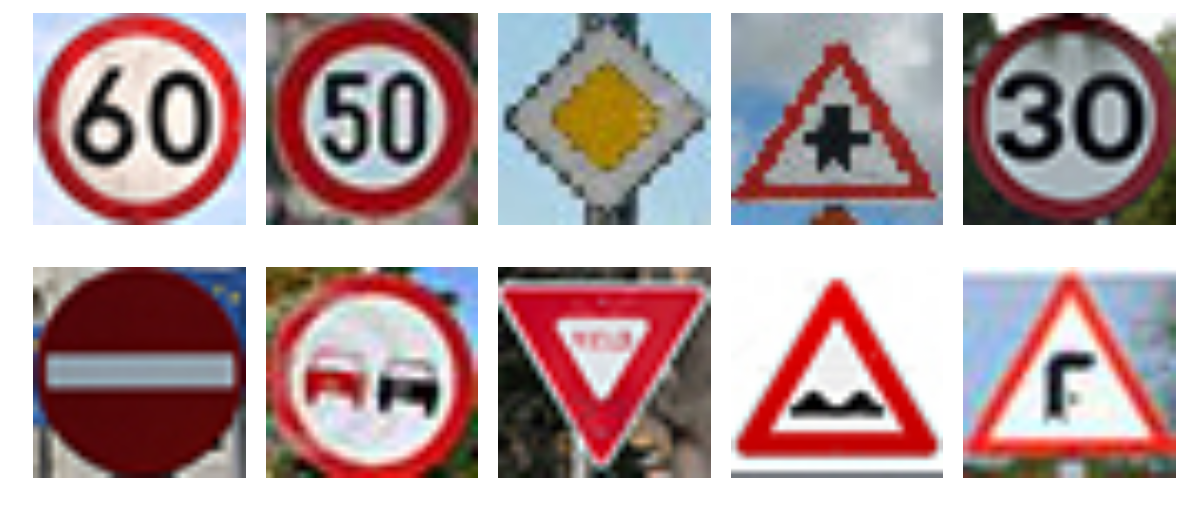

In [23]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import exposure
import numpy as np
import tensorflow as tf
import cv2
import glob
import matplotlib.image as mpimg

fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

my_images = []
my_images_processed_ = []

for i, img in enumerate(glob.glob('./my_street_signs/small/*a.jpg')):
    image = cv2.imread(img)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))    
    my_images.append(image)

my_images_ = np.asarray(my_images)

grayscale = np.sum(my_images_/3, axis=3, keepdims=True)
for i, img in enumerate(grayscale):
    p2 = np.percentile(grayscale, 2)
    p98 = np.percentile(grayscale, 98)
    img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
    #img_rescale = np.reshape(img_rescale, (32, 32,1))
    my_images_processed_.append(img_rescale)

my_images_processed = np.asarray(my_images_processed_)

print("Number of images: ", my_images_processed.shape[0])

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I chose 10 signs instead of 5, and obtained a 60% accuracy. The challenges I see are:

- The sign in the original images does not occupy the whole image and require manual cropping.
- In a lot of street signs, there's several staked on top of each other. I see this as a challenge for a classifier used in a self driving car, as all signs will have to be classified. 

In [24]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

my_signs_labels = [3, 2, 12, 11, 1, 17, 9, 13, 22, 20]


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver__ = tf.train.import_meta_graph('./nn.meta')
    saver__.restore(sess, "./nn")
    my_accuracy = evaluate(my_images_processed, my_signs_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

Test Set Accuracy = 0.700


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The model predicted correctly 70% of my test images. On the test set, it had an accurary of 94.5%. Thus, my classifier performs worse on my own images. It seems to have difficulty distinguishing signs of the same shape, e.g. the different speed signs.
I believe the model is also overfitting the training data, since I can boost the accuracy of the classification of my images to 80% by introducing dropout after the first and second convolution layers. However, the accuracy on the test set drops to 94%, and I'm concerned that will not pass the acceptance threshold (I was told 94.5%). (I tried an architecture similar to the one suggested by the previews reviewer, but I didn't get the expected performance improvement (perhaps the size of each layer needs optimization)


In [25]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver___ = tf.train.import_meta_graph('./nn.meta')
    saver___.restore(sess, "./nn")
    
    my_signs_softmax_logits = sess.run(softmax_logits, 
                                 feed_dict={x: my_images_processed,  y: my_signs_labels,
                                            keep_prob: 1.0})
    
    #print(my_signs_softmax_logits)
    top_k_ = sess.run(top_k, feed_dict={x: my_images_processed, y: my_signs_labels, keep_prob: 1.0})
    #print(top_k_)
    
    def draw(image):
        plt.figure(figsize=(1,1))
        plt.imshow(image)
        
    sign_names = {}
    with open("./signnames.csv", "r") as fh:
        for line in fh.readlines():
            l = line.strip().split(",")
            sign_names[l[0]] = l[1]
        
    for i in range(len(my_images)):
        #draw(cv2.cvtColor(my_images[i], cv2.COLOR_BGR2RGB))
               
        print("My image class: {} ({}), Predictions:".format(str(my_signs_labels[i]), sign_names[str(my_signs_labels[i])]))

        for j in range(5):
            print("\tresult #{}: class {} ({})  with {:.0f}% certainty".format(j+1, top_k_[1][i][j], sign_names[str(top_k_[1][i][j])], top_k_[0][i][j]*100) )

My image class: 3 (Speed limit (60km/h)), Predictions:
	result #1: class 1 (Speed limit (30km/h))  with 50% certainty
	result #2: class 37 (Go straight or left)  with 46% certainty
	result #3: class 2 (Speed limit (50km/h))  with 3% certainty
	result #4: class 3 (Speed limit (60km/h))  with 0% certainty
	result #5: class 40 (Roundabout mandatory)  with 0% certainty
My image class: 2 (Speed limit (50km/h)), Predictions:
	result #1: class 1 (Speed limit (30km/h))  with 95% certainty
	result #2: class 4 (Speed limit (70km/h))  with 2% certainty
	result #3: class 0 (Speed limit (20km/h))  with 1% certainty
	result #4: class 2 (Speed limit (50km/h))  with 1% certainty
	result #5: class 14 (Stop)  with 0% certainty
My image class: 12 (Priority road), Predictions:
	result #1: class 12 (Priority road)  with 100% certainty
	result #2: class 40 (Roundabout mandatory)  with 0% certainty
	result #3: class 15 (No vehicles)  with 0% certainty
	result #4: class 17 (No entry)  with 0% certainty
	resul

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

(See above for code/result)

For the predictions that the model gets correctly, it assigns probabilities very close to 100% to the top result, and the remaining results are neglegible (< 10E-10 in many cases).
For the 3 cases that it makes a wrong prediction, the probabilty of the top result is lower (53-67%). In two cases, the correct answer would be the second predition, with 32% and 42% certainty, respectively. In one case, the correct answer is not in the top 5, and the probability of the correct prediction will be very close to 0%.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

# 